# KNN jetzt erst richtig

In [2]:
import pandas as pd
import numpy as np
import re
import datetime as dt #for working with times objects

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import warnings
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

In [8]:
df_boston_weather = pd.read_pickle("df_try.pkl")
df_boston_weather = df_boston_weather.drop("date_time", axis=1)
df_boston_weather = df_boston_weather.drop("min_temp", axis=1)
df_boston_weather = df_boston_weather.drop("max_temp", axis=1)
df_boston_weather

,precip,mean_temp,rushhour,season,Weekday,count
2,0.0,-5.6,1,3,1,4.0
3,0.0,-4.4,1,3,1,2.0
4,0.0,-5.6,0,3,1,8.0
5,0.0,-5.0,0,3,1,6.0
6,0.0,-5.0,0,3,1,11.0
...,...,...,...,...,...,...
8616,0.0,7.8,1,3,1,27.0
8617,0.0,7.2,0,3,1,26.0
8618,0.0,7.2,0,3,1,10.0
8619,0.0,6.1,0,3,1,22.0


Define X and y - vector

In [9]:
X = df_boston_weather.drop("count", axis=1)
y = df_boston_weather["count"]

## KNN-Regression: 1-Dimensional (`mean_temp`)

Split dataset in train and test set

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X["mean_temp"], y, test_size=0.3,random_state=10)

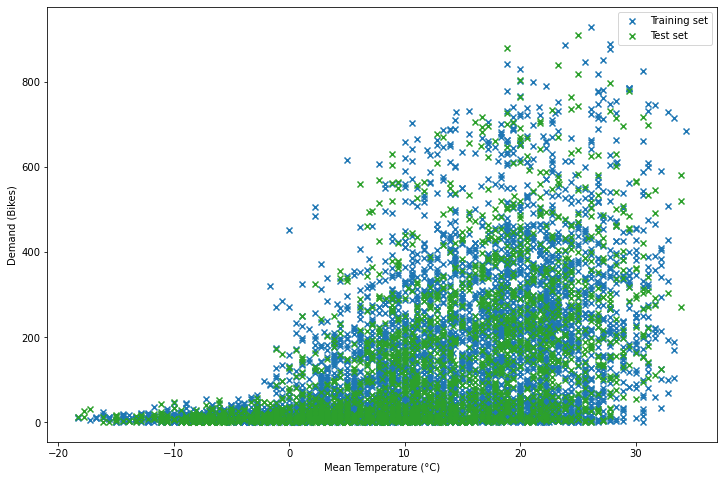

In [12]:
plt.figure(figsize = (12,8))
plt.scatter(x_train, y_train, marker='x', color="C0")
plt.scatter(x_test, y_test, marker='x', color="C2")
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Demand (Bikes)")
plt.legend(['Training set', 'Test set'])
plt.show()

do KNN-regression (initially with k=10)

In [14]:
KNN_reg = KNeighborsRegressor(n_neighbors=10)
KNN_model = KNN_reg.fit(x_train.values.reshape((-1,1)), y_train) 

# Predict
y_hat_KNN = KNN_model.predict(x_test.values.reshape((-1,1)))

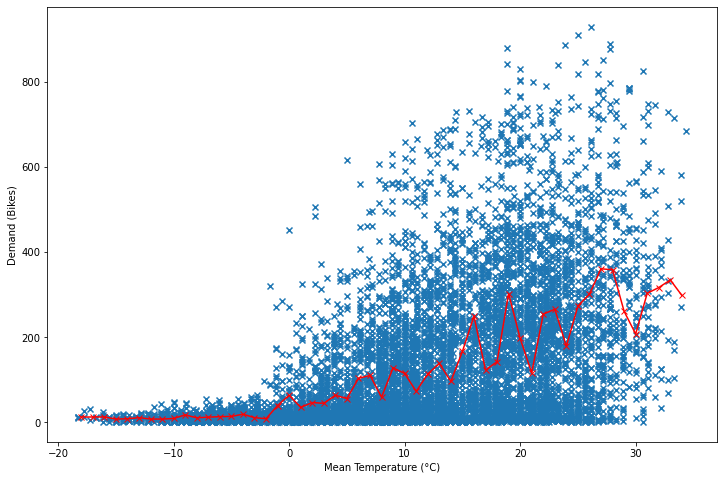

In [19]:
plt.figure(figsize = (12,8))
plt.scatter(X["mean_temp"], y, marker='x', color="C0")
plt.plot(np.arange(-18,35,1), KNN_model.predict(np.arange(-18,35,1).reshape((-1,1))), marker="x", color='r')
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Demand (Bikes)")
plt.show()

find optimal k

In [20]:
def find_knn (x_train, x_test, y_train, y_test,max_k):
    
    err_train = [] 
    err_test = []

    for n in np.arange(1,max_k):

        # fit model
        KNN_reg = KNeighborsRegressor(n_neighbors=n)
        KNN_model = KNN_reg.fit(x_train.reshape((-1,1)), y_train)


        # compute errors
        err_train.append(mean_absolute_error(KNN_model.predict(x_train.reshape((-1,1))), y_train))
        err_test.append(mean_absolute_error(KNN_model.predict(x_test.reshape((-1,1))), y_test))
        
    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,max_k), err_train,np.arange(1,max_k), err_test)
    plt.legend(["Training", "Validation"])
    plt.xlabel("Number of neighbors")
    plt.ylabel("MAE")
    #plt.ylim((0,1))
    plt.show()

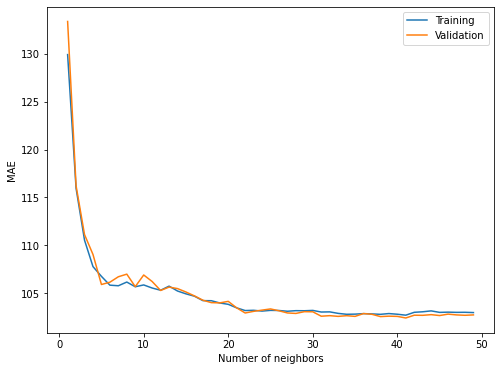

In [23]:
find_knn(x_train.values, x_test.values, y_train.values, y_test.values, 50)

looks like the optimal k is around 32, so we change it in our regression:

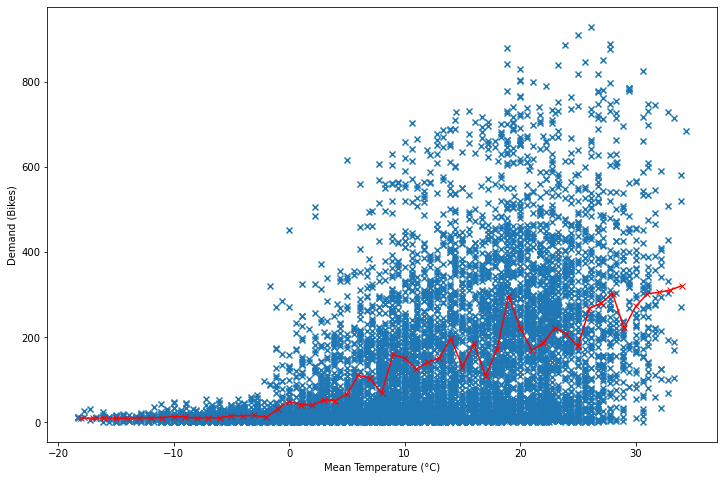

In [25]:
KNN_reg = KNeighborsRegressor(n_neighbors=32)
KNN_model = KNN_reg.fit(x_train.values.reshape((-1,1)), y_train) 

# Predict
y_hat_KNN = KNN_model.predict(x_test.values.reshape((-1,1)))

plt.figure(figsize = (12,8))
plt.scatter(X["mean_temp"], y, marker='x', color="C0")
plt.plot(np.arange(-18,35,1), KNN_model.predict(np.arange(-18,35,1).reshape((-1,1))), marker="x", color='r')
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Demand (Bikes)")
plt.show()

Evaluate the test set performance:

In [26]:
print("Test set performance:")

print("MAE:",mean_absolute_error(y_hat_KNN, y_test), "GW")
print("RMSE:",(mean_squared_error(y_hat_KNN, y_test))**(0.5), "GW")  
#print("R2:",r2_score(y_hat_KNN, y_test))

Test set performance:
MAE: 102.66499239791486 GW
RMSE: 145.14639095431602 GW
R2: -2.0101062026016514


-> it's not perfect, MAE is quite high

## KNN-Regression: 3-Dimensional (`mean_temp`, `season`, `rushhour`)

split dataset in train and test set

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X[["mean_temp", "season", "rushhour"]], y, test_size=0.3,random_state=10)

<Figure size 1152x576 with 0 Axes>

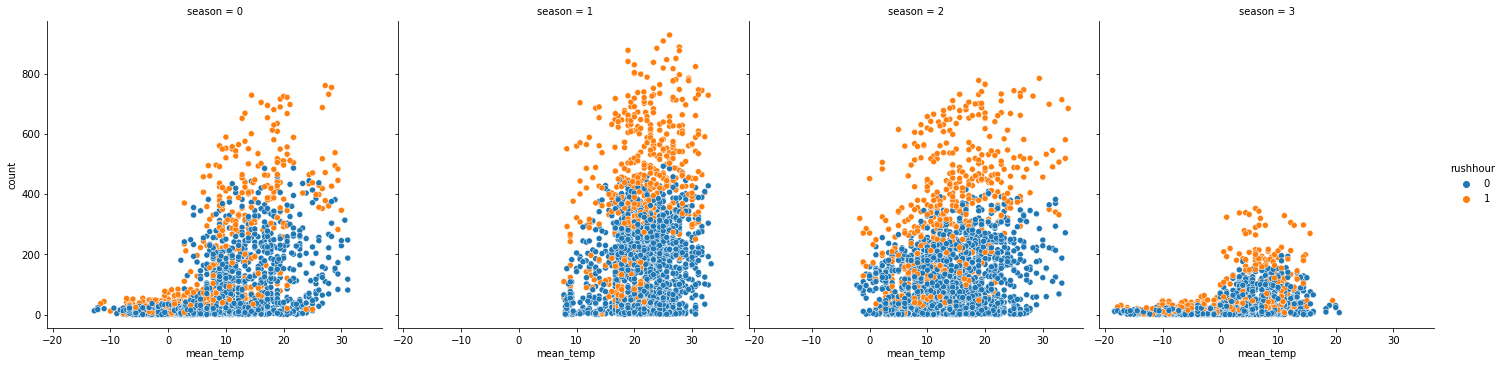

In [29]:
plt.figure(figsize=(16,8))
sns.relplot(x=X["mean_temp"], y=y, hue=X["rushhour"],
            col=X["season"])
plt.show()

In [30]:
KNN_reg = KNeighborsRegressor(n_neighbors=10)
KNN_model = KNN_reg.fit(x_train.values.reshape((-1,1)), y_train) 

# Predict
y_hat_KNN = KNN_model.predict(x_test.values.reshape((-1,1)))

ValueError: Found input variables with inconsistent numbers of samples: [16113, 5371]